<center>
<h1 style="color:red; font-size:70px;"> Transfer Learning</h1>

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from tensorflow import keras
from keras import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Flatten, Dense, Rescaling, MaxPooling2D, Conv2D, Dropout

2025-09-06 17:12:31.802903: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-06 17:12:31.840403: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-06 17:12:31.991150: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1757171552.231030  141131 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1757171552.306218  141131 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1757171552.491973  141131 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

## Immagini con interpolazione

In [ ]:
trDat = tf.keras.utils.image_dataset_from_directory(
    "../Dataset/train",
    shuffle = True,
    validation_split = 0.2,
    subset = "training",
    seed = 123,
    image_size = (128, 128),
    batch_size = 64,
    color_mode = "rgb",
    label_mode = "int"
)

Found 28709 files belonging to 7 classes.
Using 22968 files for training.


2025-09-06 17:13:12.542634: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


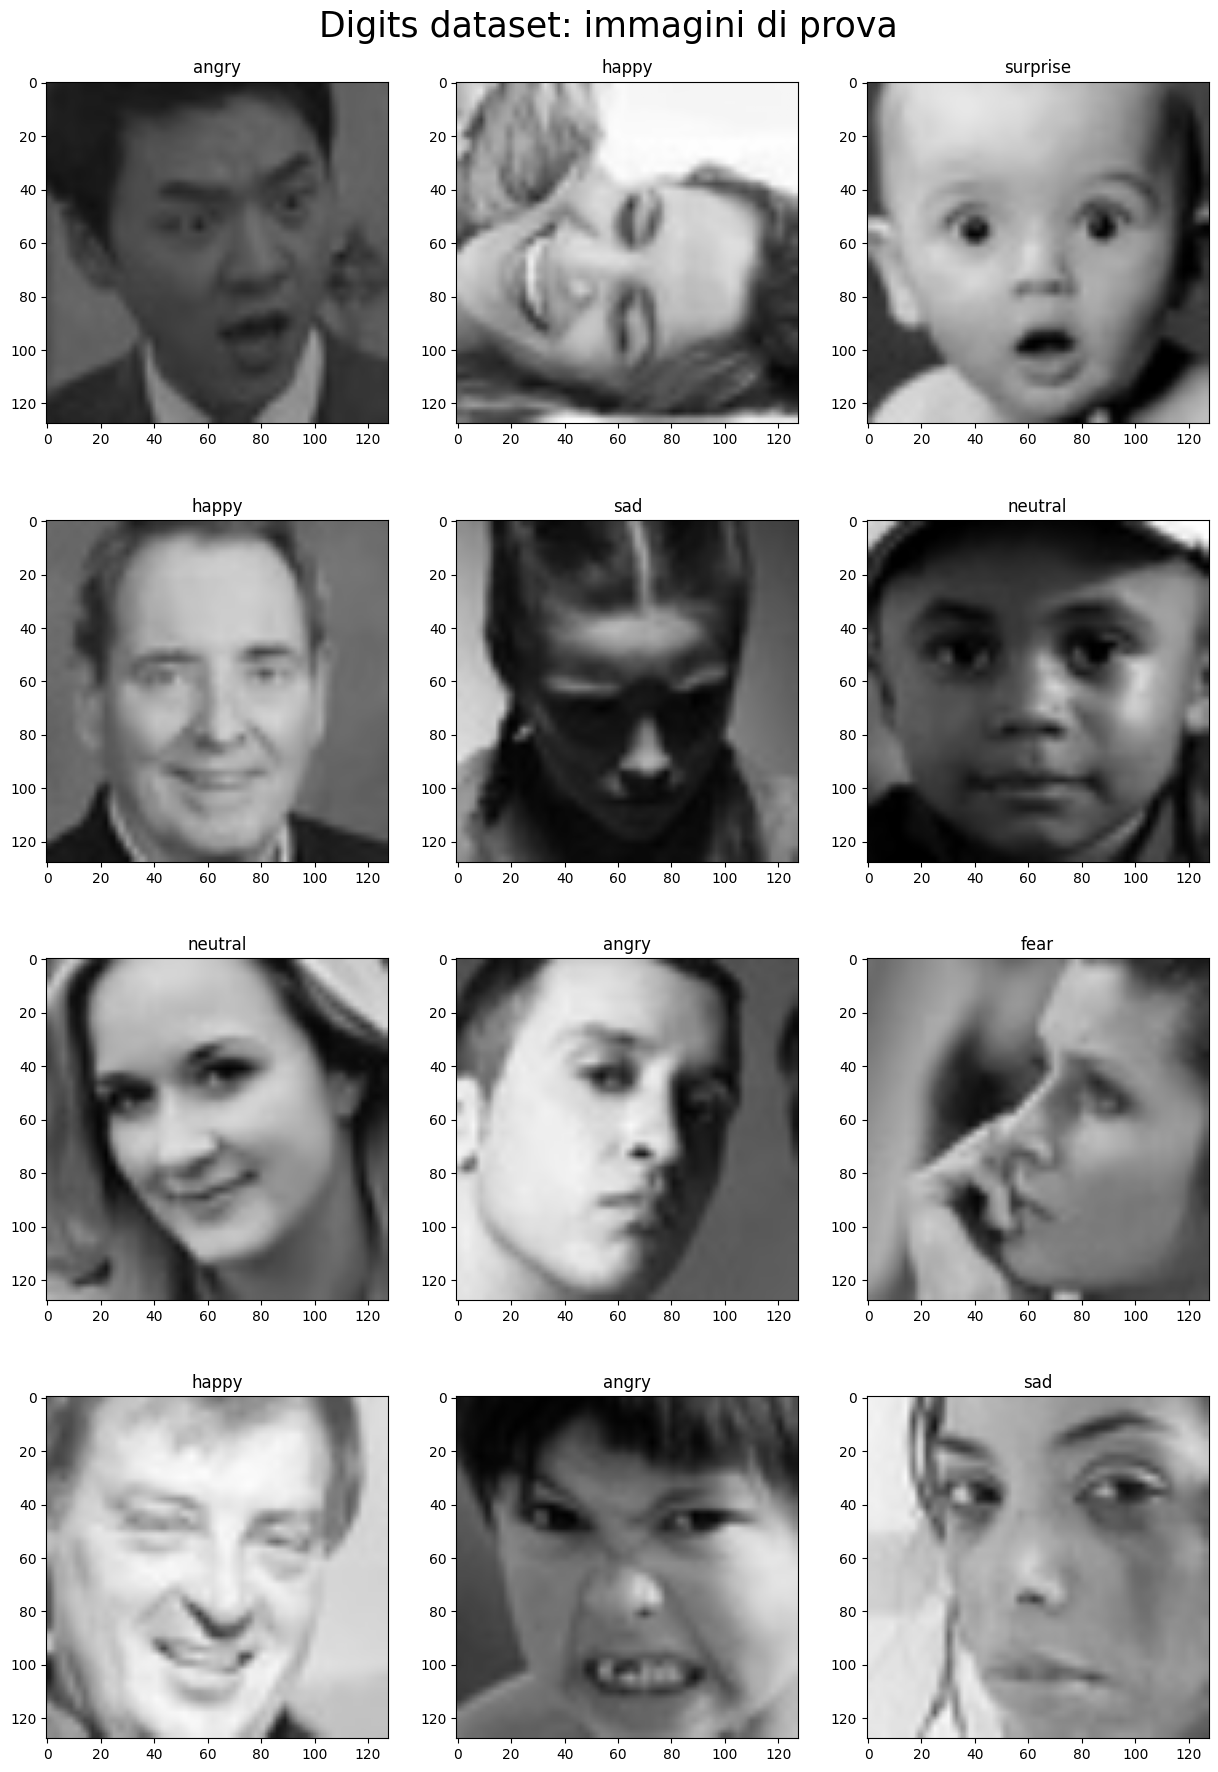

2025-09-06 20:34:30.064150: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [7]:
def studyDat(img, lab, classes):
    fig, ax = plt.subplots(4, 3, figsize = (15, 20))
    for i in range(0, 4):
        for j in range(0, 3):
            ax[i][j].imshow(img[5*i+j]/255.)
            ax[i][j].set_title(classes[lab[5*i+j]])

    fig.suptitle("Digits dataset: immagini di prova", fontsize = 25)
    plt.subplots_adjust(top=0.95)
    plt.show()


cls = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
for img, lab in trDat.take(1):
    studyDat(img, lab, cls)